Partes del preproceso:

> Bloque con sangría


  - Cargar el dataset y escoger solo las variables que necesitamos
  - Modificar los nombres raros como b'0'
  - Poner las categorias en sus categorias (hay categoricas que tienen 3 
    categorias ya que en el metadataFile estan con 10 y ahora con 3)
  - Imputar valores nulos
  - Algo mas?

In [1]:
#install.packages("dplyr")
#install.packages("imputeTS")
#install.packages("missMDA")
library(dplyr)
#library(imputeTS)
library(class)
#library(missMDA)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
df <- read.csv("speedDatingCleaned.csv", sep=",", encoding="UTF-8", na.strings = c("NA"))
df <- select(df, -"X")
df

gender,d_age,samerace,pref_o_attractive,pref_o_sincere,pref_o_intelligence,attractive_o,sinsere_o,intelligence_o,attractive_important,⋯,intelligence,attractive_partner,intelligence_partner,sincere_partner,interests_correlate,like,guess_prob_liked,decision,decision_o,match
<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
F,6,0,4,3,3,6,8,8,2,⋯,8,6,7,9,0.14,7,6,1,0,0
F,1,0,7,1,1,7,8,10,2,⋯,8,7,7,8,0.54,7,5,1,0,0
F,1,1,2,2,2,10,10,10,2,⋯,8,5,9,8,0.16,7,5,1,1,1
F,2,0,4,1,2,7,8,9,2,⋯,8,7,8,6,0.61,7,6,1,1,1
F,3,0,4,2,3,8,7,9,2,⋯,8,5,7,6,0.21,6,6,1,1,1
F,4,0,6,1,4,7,7,8,2,⋯,8,4,7,9,0.25,6,5,0,1,0
F,9,0,4,2,3,3,6,7,2,⋯,8,7,7,6,0.34,6,5,1,0,0
F,6,0,4,2,2,6,7,5,2,⋯,8,4,7,9,0.50,6,7,0,0,0
F,7,0,6,1,3,7,7,8,2,⋯,8,7,8,6,0.28,7,7,1,1,1


In [ ]:
columnas <- colnames(df)
columnas

[1] "X"                      "gender"                 "d_age"                 
 [4] "samerace"               "pref_o_attractive"      "pref_o_sincere"        
 [7] "pref_o_intelligence"    "attractive_o"           "sinsere_o"             
[10] "intelligence_o"         "attractive_important"   "sincere_important"     
[13] "intellicence_important" "attractive"             "sincere"               
[16] "intelligence"           "attractive_partner"     "intelligence_partner"  
[19] "sincere_partner"        "interests_correlate"    "like"                  
[22] "guess_prob_liked"       "decision"               "decision_o"            
[25] "match"

In [3]:
numericalVariables <- c("d_age", "attractive_o", "sinsere_o", "intelligence_o", "attractive", "sincere", "intelligence", "attractive_partner", "intelligence_partner", "sincere_partner", "interests_correlate", "like", "guess_prob_liked")
categoricalVariables <- c("pref_o_attractive", "pref_o_sincere", "pref_o_intelligence", "attractive_important","sincere_important", "intellicence_important")

# PCA


In [4]:
attach(df)
dcon<-df[,numericalVariables]
sapply(dcon,class)

d_age         attractive_o            sinsere_o 
           "integer"            "numeric"            "numeric" 
      intelligence_o           attractive              sincere 
           "numeric"            "integer"            "integer" 
        intelligence   attractive_partner intelligence_partner 
           "integer"            "numeric"            "numeric" 
     sincere_partner  interests_correlate                 like 
           "numeric"            "numeric"            "numeric" 
    guess_prob_liked 
           "numeric"

In [5]:
dcon

d_age,attractive_o,sinsere_o,intelligence_o,attractive,sincere,intelligence,attractive_partner,intelligence_partner,sincere_partner,interests_correlate,like,guess_prob_liked
<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,6,8,8,6,8,8,6,7,9,0.14,7,6
1,7,8,10,6,8,8,7,7,8,0.54,7,5
1,10,10,10,6,8,8,5,9,8,0.16,7,5
2,7,8,9,6,8,8,7,8,6,0.61,7,6
3,8,7,9,6,8,8,5,7,6,0.21,6,6
4,7,7,8,6,8,8,4,7,9,0.25,6,5
9,3,6,7,6,8,8,7,7,6,0.34,6,5
6,6,7,5,6,8,8,4,7,9,0.50,6,7
7,7,7,8,6,8,8,7,8,6,0.28,7,7


In [6]:
pc1 <- prcomp(dcon, scale=TRUE)
class(pc1)
attributes(pc1)

[1] "prcomp"

$names
[1] "sdev"     "rotation" "center"   "scale"    "x"       

$class
[1] "prcomp"

In [7]:
print(pc1)

Standard deviations (1, .., p=13):
 [1] 1.7347824 1.3704841 1.2609250 1.0278794 0.9812506 0.9590595 0.9007339
 [8] 0.8366528 0.7525891 0.7332455 0.5882116 0.5844694 0.5293784

Rotation (n x k) = (13 x 13):
                              PC1         PC2         PC3          PC4
d_age                -0.004024887 -0.02615859  0.05763597  0.670296353
attractive_o         -0.161607979 -0.47392262 -0.18008078  0.061876504
sinsere_o            -0.183392321 -0.57975141  0.08058158 -0.021418901
intelligence_o       -0.177898351 -0.58061416  0.10925022 -0.061112801
attractive           -0.145410905  0.01631770 -0.61006932  0.084771336
sincere              -0.113285338  0.09510772 -0.30418844 -0.312544468
intelligence         -0.173356122  0.04347251 -0.56310650  0.070869943
attractive_partner   -0.382772591  0.16161908  0.26790919  0.019711757
intelligence_partner -0.421540670  0.14282409  0.09403240 -0.024047224
sincere_partner      -0.430185239  0.14439858  0.10121294  0.028533643
interests_cor

In [ ]:
str(pc1)

List of 5
 $ sdev    : num [1:13] 1.735 1.37 1.261 1.028 0.981 ...
 $ rotation: num [1:13, 1:13] -0.00402 -0.16161 -0.18339 -0.1779 -0.14541 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:13] "d_age" "attractive_o" "sinsere_o" "intelligence_o" ...
  .. ..$ : chr [1:13] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:13] 4.19 6.19 7.17 7.36 7.08 ...
  ..- attr(*, "names")= chr [1:13] "d_age" "attractive_o" "sinsere_o" "intelligence_o" ...
 $ scale   : Named num [1:13] 4.6 1.93 1.71 1.52 1.39 ...
  ..- attr(*, "names")= chr [1:13] "d_age" "attractive_o" "sinsere_o" "intelligence_o" ...
 $ x       : num [1:8378, 1:13] -0.721 -0.858 -1.439 -0.689 0.304 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:13] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


## Subspace inertia

Plot of the subspace inertia by each dimension of PCA

[1] 1.7347824 1.3704841 1.2609250 1.0278794 0.9812506 0.9590595 0.9007339
 [8] 0.8366528 0.7525891 0.7332455 0.5882116 0.5844694 0.5293784

[1] 3.0094698 1.8782267 1.5899319 1.0565360 0.9628528 0.9197951 0.8113216
 [8] 0.6999879 0.5663903 0.5376489 0.3459929 0.3416045 0.2802414

[1] 13

[1] 23.149768 14.447898 12.230245  8.127200  7.406560  7.075347  6.240935
 [8]  5.384522  4.356849  4.135761  2.661484  2.627727  2.155703

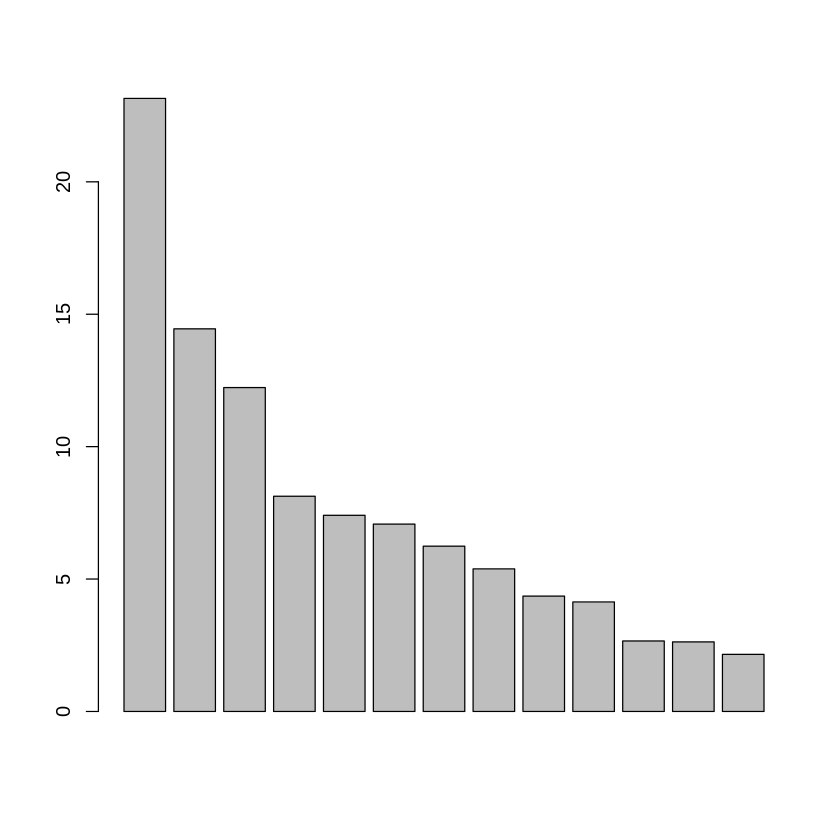

In [8]:
pc1$sdev
inerProj<- pc1$sdev^2 
inerProj
totalIner<- sum(inerProj)
totalIner
pinerEix<- 100*inerProj/totalIner
pinerEix
barplot(pinerEix)

### Accumulated Inertia


Plot of accumulated inertia by number of dimensions


[1]  23.14977  37.59767  49.82791  57.95511  65.36167  72.43702  78.67795
 [8]  84.06248  88.41932  92.55509  95.21657  97.84430 100.00000

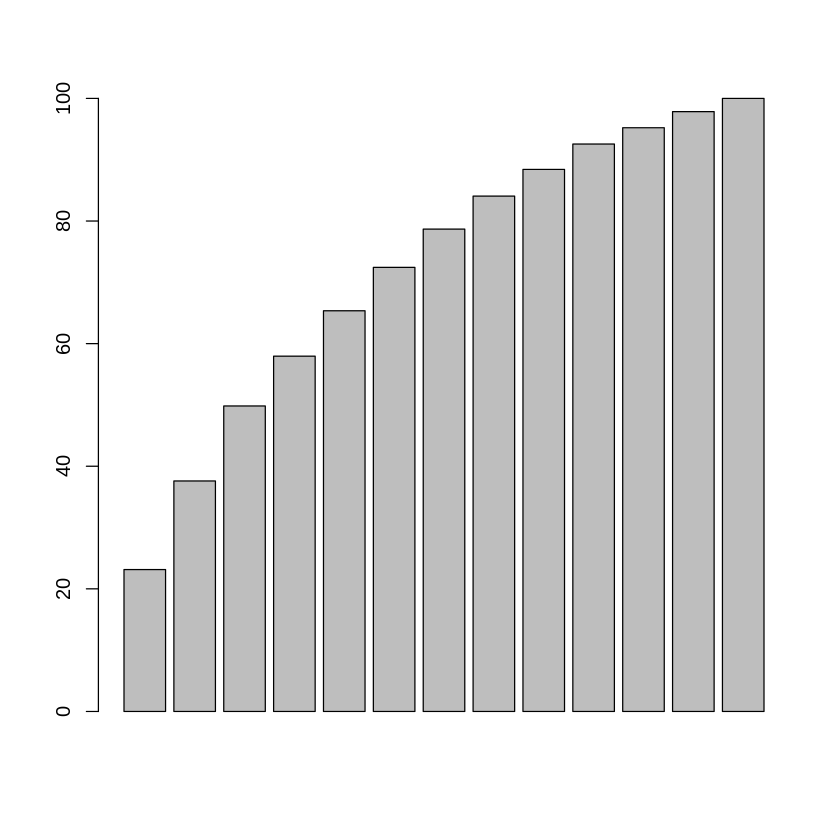

In [9]:
barplot(100*cumsum(pc1$sdev[1:dim(dcon)[2]]^2)/dim(dcon)[2])
percInerAccum<-100*cumsum(pc1$sdev[1:dim(dcon)[2]]^2)/dim(dcon)[2]
percInerAccum

In [ ]:
# We select 8 dimensions so we keep, at least, the 80% of the total inertia
nd = 8

print(pc1)
attributes(pc1)
pc1$rotation

Standard deviations (1, .., p=13):
 [1] 1.7347824 1.3704841 1.2609250 1.0278794 0.9812506 0.9590595 0.9007339
 [8] 0.8366528 0.7525891 0.7332455 0.5882116 0.5844694 0.5293784

Rotation (n x k) = (13 x 13):
                              PC1         PC2         PC3          PC4
d_age                -0.004024887 -0.02615859  0.05763597  0.670296353
attractive_o         -0.161607979 -0.47392262 -0.18008078  0.061876504
sinsere_o            -0.183392321 -0.57975141  0.08058158 -0.021418901
intelligence_o       -0.177898351 -0.58061416  0.10925022 -0.061112801
attractive           -0.145410905  0.01631770 -0.61006932  0.084771336
sincere              -0.113285338  0.09510772 -0.30418844 -0.312544468
intelligence         -0.173356122  0.04347251 -0.56310650  0.070869943
attractive_partner   -0.382772591  0.16161908  0.26790919  0.019711757
intelligence_partner -0.421540670  0.14282409  0.09403240 -0.024047224
sincere_partner      -0.430185239  0.14439858  0.10121294  0.028533643
interests_cor

$names
[1] "sdev"     "rotation" "center"   "scale"    "x"       

$class
[1] "prcomp"

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
d_age,-0.004024887,-0.02615859,0.05763597,0.670296353,-0.686964673,0.21287759,-0.15218536,0.060769082,-0.025005951,0.0331503701,-0.002819522,-0.02853583,0.006583553
attractive_o,-0.161607979,-0.47392262,-0.18008078,0.061876504,-0.024765536,-0.12006220,0.29151416,0.336616180,0.683430301,0.1772787975,-0.023518732,0.01418729,-0.021072407
sinsere_o,-0.183392321,-0.57975141,0.08058158,-0.021418901,0.054613219,0.13705680,-0.12394099,-0.150607016,-0.251197494,-0.0221793106,0.576671134,0.40826682,0.025862880
intelligence_o,-0.177898351,-0.58061416,0.10925022,-0.061112801,0.032590760,0.08855853,-0.11163145,-0.158513418,-0.245278356,-0.1326335833,-0.565313839,-0.41346090,-0.028166264
attractive,-0.145410905,0.01631770,-0.61006932,0.084771336,-0.074482723,-0.17793135,0.02268803,-0.093387726,0.003480596,-0.7384878534,0.015428742,0.06138641,0.058246313
sincere,-0.113285338,0.09510772,-0.30418844,-0.312544468,-0.006964963,0.78722307,-0.26168876,0.302036631,0.086987524,0.0034195670,-0.023401366,-0.01703298,0.003772151
intelligence,-0.173356122,0.04347251,-0.56310650,0.070869943,0.005595969,-0.02365762,-0.04229964,-0.550824121,-0.030578325,0.5792569150,-0.042884002,-0.03814646,0.019775051
attractive_partner,-0.382772591,0.16161908,0.26790919,0.019711757,0.060170551,-0.01824674,-0.39431777,-0.308392545,0.427702113,-0.1467308418,-0.033600445,0.10671012,-0.532615758
intelligence_partner,-0.421540670,0.14282409,0.09403240,-0.024047224,-0.068805229,0.15099264,0.51055231,-0.051103140,-0.108913645,-0.0524838698,0.404101645,-0.54123420,-0.175575933
sincere_partner,-0.430185239,0.14439858,0.10121294,0.028533643,-0.037554953,0.12962106,0.45639986,0.039684198,-0.203889181,0.0279815026,-0.421329993,0.57881676,0.006500299


In [ ]:
View(pc1$x)
dim(pc1$x)
dim(dcon)
dcon[8349,]
pc1$x[8349,]

Psi = pc1$x[,1:nd]
dim(Psi)
Psi[8349,]

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
-0.72082684,-0.3194988,0.63616341,0.40906498,-0.025341483,0.11567924,0.0001035001,0.06869530,-0.62913186,0.7445105,-0.48436790,0.61412262,0.33350193
-0.85763741,-1.3561118,0.83077592,-1.26841764,-0.163832470,-0.28452660,-0.1920635987,-0.56555442,-0.04450987,0.4970754,-1.01305018,-0.07855813,0.11839464
-1.43913571,-2.7214474,0.45095166,-0.42573972,0.599932947,0.21218944,1.2374829447,0.10918293,0.13486865,0.7733754,0.18151102,-0.46470809,0.44648145
-0.68922132,-1.0380096,0.63544803,-1.25615063,-0.469357748,-0.59050354,-0.5098307096,-0.26721878,0.10047143,0.6320511,0.13089363,-0.85931748,-0.11478296
0.30426910,-1.2573388,0.01749096,-0.20909923,0.228447459,-0.38258992,-0.0590661994,0.43828135,0.13151880,0.8710292,-0.48085940,-0.86328997,0.10789854
0.11065089,-0.4933294,0.18098745,-0.12926433,-0.151178119,0.05764853,0.9819848868,0.32817140,-0.46842066,0.9072243,-0.83298747,0.38690511,0.55454358
0.81439132,1.1738517,0.74787708,0.30970345,-0.951940215,0.07219776,-1.0670734691,-0.67998982,-0.58301714,0.4111369,-0.06513779,-0.47392551,-0.23378428
0.18420975,0.9111529,-0.06348167,-0.23684795,-1.026240134,-0.53398806,0.6531830410,0.99265084,-0.70456784,1.3230442,0.32564819,1.17094855,0.36080813
-0.60068546,-0.2959670,0.45897505,0.26776643,-0.465263331,-0.41629464,-0.6459774199,0.32908466,0.19860737,0.8155303,0.16942439,-0.94018383,-0.22596326
1.26681742,0.6701339,-0.17750493,1.11026069,1.540066963,-0.15169944,-0.3428879206,0.63229175,0.11565266,0.9093449,0.04253438,-0.04439913,0.29757942


[1] 8378   13

[1] 8378   13

,d_age,attractive_o,sinsere_o,intelligence_o,attractive,sincere,intelligence,attractive_partner,intelligence_partner,sincere_partner,interests_correlate,like,guess_prob_liked
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8349,0,8,5,7,7,8,3,4,7,8,0.55,8,7


PC1         PC2         PC3         PC4         PC5         PC6 
 0.19120144  0.30770825  1.25712909 -1.38351439 -0.28569640 -1.27200091 
        PC7         PC8         PC9        PC10        PC11        PC12 
 0.74833426  2.90296945  0.40535371 -1.08718396 -0.66893399 -0.07451692 
       PC13 
 1.09540751

[1] 8378    8

PC1        PC2        PC3        PC4        PC5        PC6        PC7 
 0.1912014  0.3077083  1.2571291 -1.3835144 -0.2856964 -1.2720009  0.7483343 
       PC8 
 2.9029695

In [ ]:
iden = row.names(dcon)
etiq = names(dcon)
ze = rep(0,length(etiq))

We will plot every possible subspace from the dimensions we kept, so we know which one we are going to choose

In [ ]:
old.par <- par(mfrow=c(2, 1))
combinaciones <- as.data.frame(expand.grid(1:nd, 1:nd))
for(parIt in 1:nrow(combinaciones)){
  pair <- combinaciones[parIt,]
  if(pair[1] < pair[2]){
    eje1 <- pair[1,1]
    eje2 <- pair[1,2]
    
    plot(Psi[,eje1],Psi[,eje2], main = paste("Subspace (X: ", eje1, " , Y: ", eje2, ")", sep="") , xlab = paste("Dim", eje1), ylab = paste("Dim", eje2))
    text(Psi[,eje1],Psi[,eje2],labels=iden, cex=0.5)
    axis(side=1, pos= 0, labels = F, col="cyan")
    axis(side=3, pos= 0, labels = F, col="cyan")
    axis(side=2, pos= 0, labels = F, col="cyan")
    axis(side=4, pos= 0, labels = F, col="cyan")
  }
}
par(old.par)

Output hidden; open in https://colab.research.google.com to view.

From all the plots obtained, we can clearly see that the subspaces (1,2), (1,3) ad (1,4) represent more variability than the others, now we are going to compare this 2 subspace in depth to decide which one are we working with

We look at our possibilities

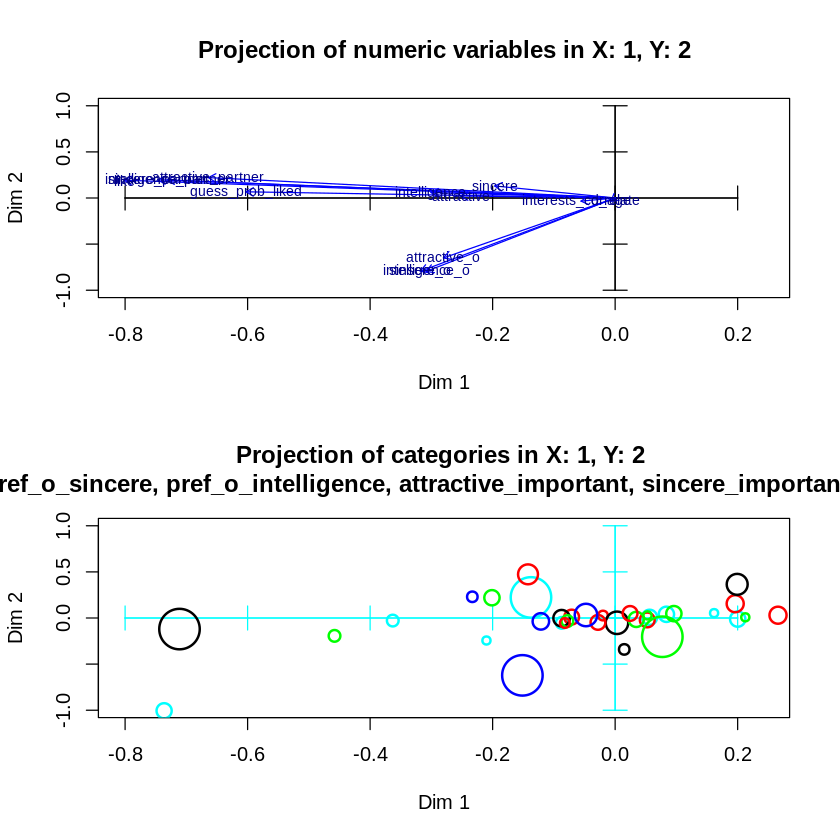

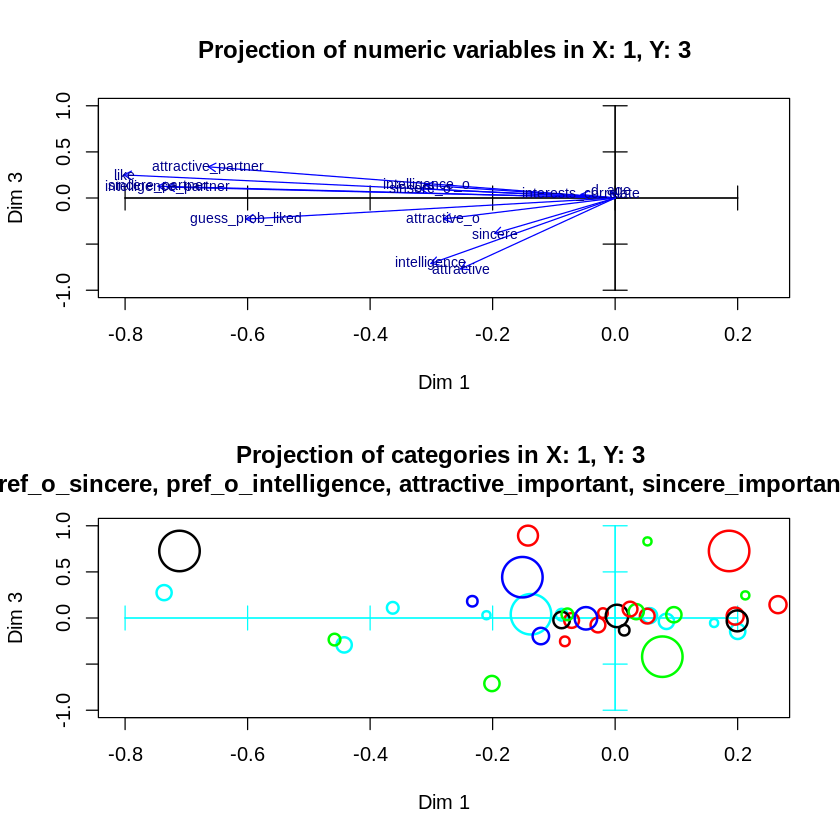

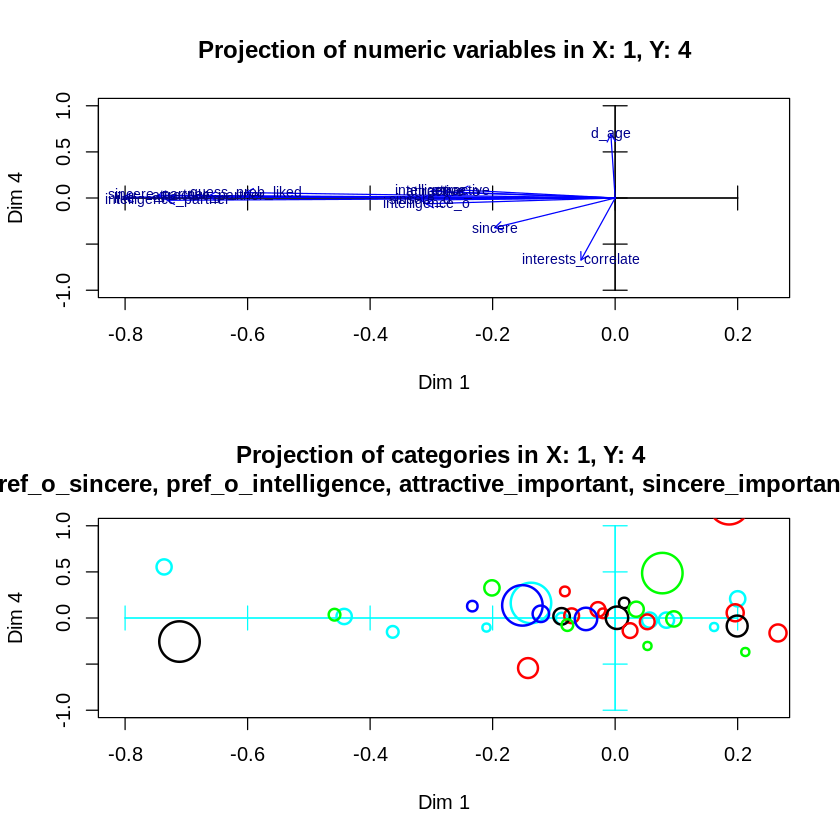

In [ ]:
old.par <- par(mfrow=c(2, 1))
pointSize <- function(var){
  4*summary(var)/max(summary(var))+0.5
}
Phi = cor(dcon,Psi)
combinations <- list()
combinations[[1]] <- c(1,2) 
combinations[[2]] <- c(1,3)
combinations[[3]] <- c(1,4)
xlim <- c(1.5, 1.5)
ylim <- c(2, 1.5)
for(i in 1:3){
  pair <- combinations[[i]]
  eje1 <- pair[1]
  eje2 <- pair[2]
  
  X<-Phi[,eje1]
  Y<-Phi[,eje2]
  {
    plot(Psi[,eje1],Psi[,eje2],type="n",xlim=c(min(X,0),max(X+0.25,0)), ylim=c(-1,1), xlab = paste("Dim", eje1), ylab = paste("Dim", eje2), main = paste("Projection of numeric variables in X: ", eje1, ", Y: ", eje2, sep = "") )
    axis(side=1, pos= 0, labels = F)
    axis(side=3, pos= 0, labels = F)
    axis(side=2, pos= 0, labels = F)
    axis(side=4, pos= 0, labels = F)
    arrows(ze, ze, X, Y, length = 0.07,col="blue")
    text(X,Y,labels=etiq,col="darkblue", cex=0.7)
  }
  
{
  selectedVars <- c('pref_o_attractive','pref_o_sincere','pref_o_intelligence','attractive_important','sincere_important','intellicence_important')
  
  plot(Psi[,eje1],Psi[,eje2],type="n",xlim=c(min(X,0),max(X+0.25,0)), ylim=c(-1,1),  xlab = paste("Dim", eje1), ylab = paste("Dim", eje2), main = paste("Projection of categories in X: ", eje1, ", Y: ", eje2, " \n (", paste(selectedVars, collapse=", "),")", sep=""))
  axis(side=1, pos= 0, labels = F, col="cyan")
  axis(side=3, pos= 0, labels = F, col="cyan")
  axis(side=2, pos= 0, labels = F, col="cyan")
  axis(side=4, pos= 0, labels = F, col="cyan")
  
  pointColors <- c("cyan", "red", "black", "green", "red", "blue")
  textColors <- c("cyan", "red", "black", "green", "red", "blue")
  
  # Plot categorical variables
  for(i in 1:length(selectedVars)){
    varcat <- df[,selectedVars[i]]
    fdic1 = tapply(Psi[,eje1],varcat,mean)
    fdic2 = tapply(Psi[,eje2],varcat,mean)
    points(fdic1,fdic2,pch=21, lwd = 2 ,col=pointColors[i], labels=levels(varcat), cex=pointSize(varcat))
    text(fdic1,fdic2+0.03,labels=levels(varcat),col=textColors[i], cex=0.8,lwd=2)
  }
}
}
par(old.par)

With the obtained results, we decided to use the subspace formed by the axis 1 and 3, because the vectors are more apart from each other. This means that the axis 3 represents a higher amount of variability with respect from the others, with a similar contribution value.

Plot of the chosen subspace

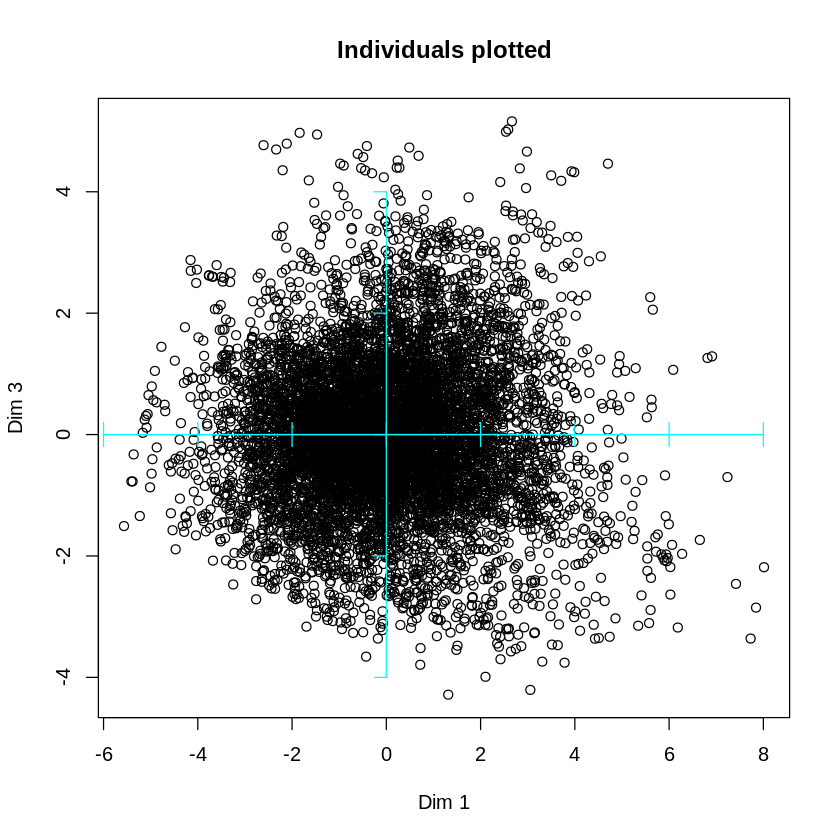

In [ ]:
eje1 <- 1
eje2 <- 3
plot(Psi[,eje1],Psi[,eje2], main = "Individuals plotted", xlab = paste("Dim", eje1), ylab = paste("Dim", eje2))
axis(side=1, pos= 0, labels = F, col="cyan")
axis(side=3, pos= 0, labels = F, col="cyan")
axis(side=2, pos= 0, labels = F, col="cyan")


Numerical variables projection

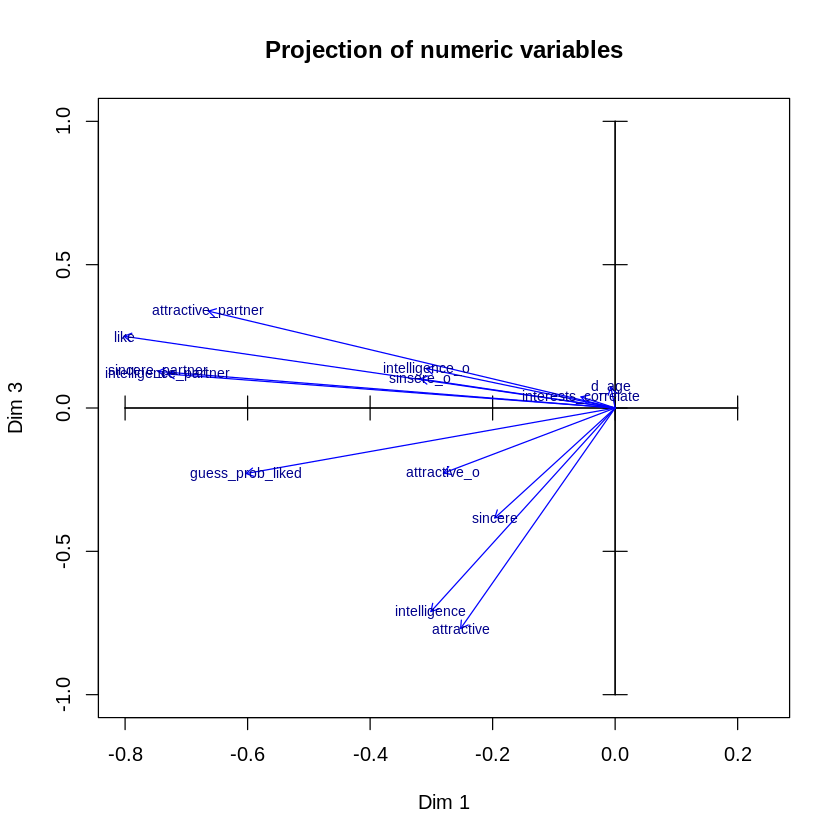

In [ ]:
eje1 <- 1
eje2 <- 3
  
X<-Phi[,eje1]
Y<-Phi[,eje2]
  
plot(Psi[,eje1],Psi[,eje2],type="n",xlim=c(min(X,0),max(X+0.25,0)), ylim=c(-1,1), xlab = paste("Dim", eje1), ylab = paste("Dim", eje2), main = "Projection of numeric variables")
axis(side=1, pos= 0, labels = F)
axis(side=3, pos= 0, labels = F)
axis(side=2, pos= 0, labels = F)
axis(side=4, pos= 0, labels = F)
arrows(ze, ze, X, Y, length = 0.07,col="blue")
text(X,Y,labels=etiq,col="darkblue", cex=0.7)

In [ ]:
Phi = cor(dcon,Psi)
View(Phi)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
d_age,-0.006982302,-0.03584993,0.07267463,0.68898380,-0.674084530,0.20416227,-0.13707851,0.050842621
attractive_o,-0.280354670,-0.64950342,-0.22706836,0.06360158,-0.024301199,-0.11514679,0.26257669,0.281630862
sinsere_o,-0.318145763,-0.79454009,0.10160733,-0.02201605,0.053589257,0.13144563,-0.11163786,-0.126005778
intelligence_o,-0.308614920,-0.79572248,0.13775634,-0.06281659,0.031979704,0.08493290,-0.10055023,-0.132620692
attractive,-0.252256273,0.02236315,-0.76925166,0.08713471,-0.073086221,-0.17064675,0.02043588,-0.078133100
sincere,-0.196525405,0.13034361,-0.38355881,-0.32125801,-0.006834374,0.75499377,-0.23571194,0.252699786
intelligence,-0.300735141,0.05957838,-0.71003507,0.07284575,0.005491049,-0.02268906,-0.03810072,-0.460848530
attractive_partner,-0.664027137,0.22149638,0.33781340,0.02026131,0.059042392,-0.01749971,-0.35517539,-0.258017479
intelligence_partner,-0.731281316,0.19573814,0.11856781,-0.02471765,-0.067515176,0.14481092,0.45987179,-0.042755584
sincere_partner,-0.746277762,0.19789597,0.12762193,0.02932914,-0.036850822,0.12431431,0.41109483,0.033201895


Categorical variables projection

In [ ]:
categoricalVariables

[1] "pref_o_attractive"      "pref_o_sincere"         "pref_o_intelligence"   
[4] "attractive_important"   "sincere_important"      "intellicence_important"

In [ ]:
df

X,gender,d_age,samerace,pref_o_attractive,pref_o_sincere,pref_o_intelligence,attractive_o,sinsere_o,intelligence_o,⋯,intelligence,attractive_partner,intelligence_partner,sincere_partner,interests_correlate,like,guess_prob_liked,decision,decision_o,match
<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,F,6,0,4,3,3,6,8,8,⋯,8,6,7,9,0.14,7,6,1,0,0
2,F,1,0,7,1,1,7,8,10,⋯,8,7,7,8,0.54,7,5,1,0,0
3,F,1,1,2,2,2,10,10,10,⋯,8,5,9,8,0.16,7,5,1,1,1
4,F,2,0,4,1,2,7,8,9,⋯,8,7,8,6,0.61,7,6,1,1,1
5,F,3,0,4,2,3,8,7,9,⋯,8,5,7,6,0.21,6,6,1,1,1
6,F,4,0,6,1,4,7,7,8,⋯,8,4,7,9,0.25,6,5,0,1,0
7,F,9,0,4,2,3,3,6,7,⋯,8,7,7,6,0.34,6,5,1,0,0
8,F,6,0,4,2,2,6,7,5,⋯,8,4,7,9,0.50,6,7,0,0,0
9,F,7,0,6,1,3,7,7,8,⋯,8,7,8,6,0.28,7,7,1,1,1


In [ ]:
varcat <- df[,'pref_o_attractive']
levels(df$pref_o_attractive) <- c(unique(varcat))
unique(varcat)
varcat <- df[,'pref_o_sincere']
levels(df$pref_o_sincere) <- c(unique(varcat))
unique(varcat)
varcat <- df[,'pref_o_intelligence']
levels(df$pref_o_intelligence) <- c(unique(varcat))
unique(varcat)
varcat <- df[,'attractive_important']
levels(df$attractive_important) <- c(unique(varcat))
unique(varcat)
varcat <- df[,'sincere_important']
levels(df$sincere_important) <- c(unique(varcat))
unique(varcat)
varcat <- df[,'intellicence_important']
levels(df$intellicence_important) <- c(unique(varcat))
unique(varcat)

[1]  4  7  2  6 10  5  3  1  9  8

[1] 3 1 2 4 5 7

[1] 3 1 2 4 5 6

[1]  2  5  4  3  1  7  6 10  9  8

[1] 3 1 2 4 5 7

[1] 3 4 2 1 5 6

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"labels" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"labels" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"labels" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"labels" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"labels" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"labels" is not a graphical parameter”


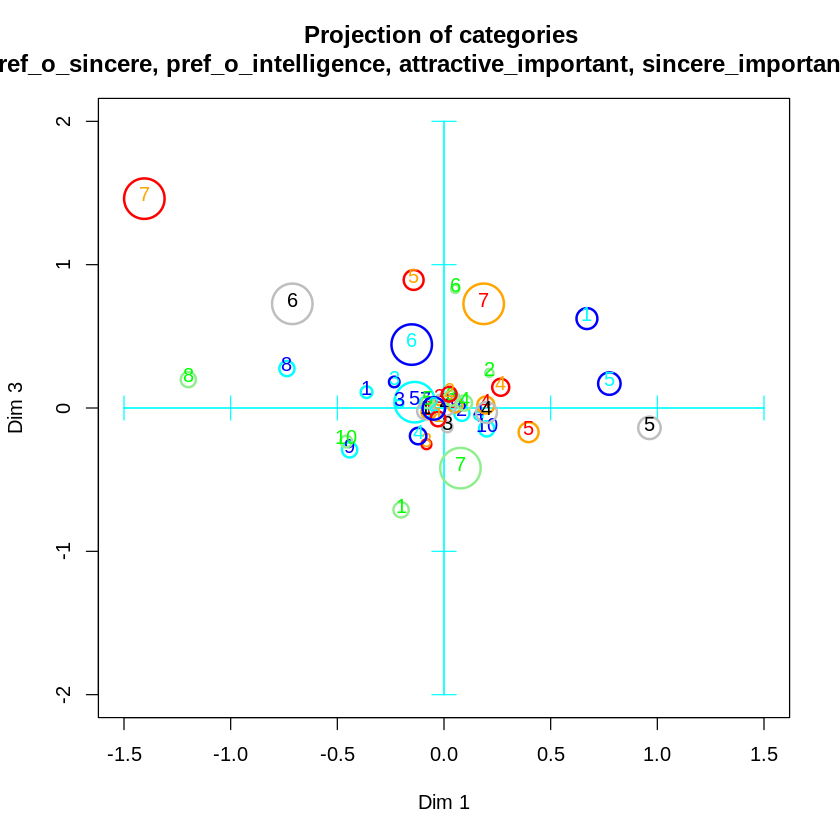

In [ ]:
plot(Psi[,1],Psi[,3],type="n", xlim=c(-1.5, 1.5), ylim=c(-2, 2),  xlab = paste("Dim", 1), ylab = paste("Dim", 3), main = paste("Projection of categories \n (", paste(categoricalVariables, collapse=", "),")", sep=""))
axis(side=1, pos= 0, labels = F, col="cyan")
axis(side=3, pos= 0, labels = F, col="cyan")
axis(side=2, pos= 0, labels = F, col="cyan")
axis(side=4, pos= 0, labels = F, col="cyan")
  
pointColors <- c("cyan", "orange", "grey", "lightgreen", "red", "blue")
textColors <- c("blue", "red", "black", "green", "orange", "cyan")
  
  # Plot categorical variables 
for(i in 1:length(categoricalVariables)){
  varcat <- df[,categoricalVariables[i]]
  fdic1 = tapply(Psi[,1],varcat,mean)
  fdic2 = tapply(Psi[,3],varcat,mean)
  points(fdic1,fdic2,pch=21, lwd = 2 ,col=pointColors[i], labels=levels(varcat), cex=pointSize(varcat))
  text(fdic1,fdic2+0.03,labels=levels(varcat),col=textColors[i], cex=1,lwd=2)
}
  
  # Plot numeric variables
#arrows(ze, ze, X, Y, length = 0.07,col="blue")
#text(X,Y,labels=etiq,col="darkblue", cex=0.7)
  
